Elise Hadidi
Github Username: elise-hadidi
USCID: 1137648541

In [1948]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.linalg import pinv


# Question 1, Part a

In [1949]:
# defining the columns
columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_spondylolisthesis', 'label']

# loading in the dataset
df = pd.read_csv("../data/column_2C.dat", header=None, names=columns, sep='\s+')

In [1950]:
# encoding NO to O and AB to 1
df['label'] = np.where(df['label'] == 'NO', 0, 1)

# Question 1, Part b

# i 

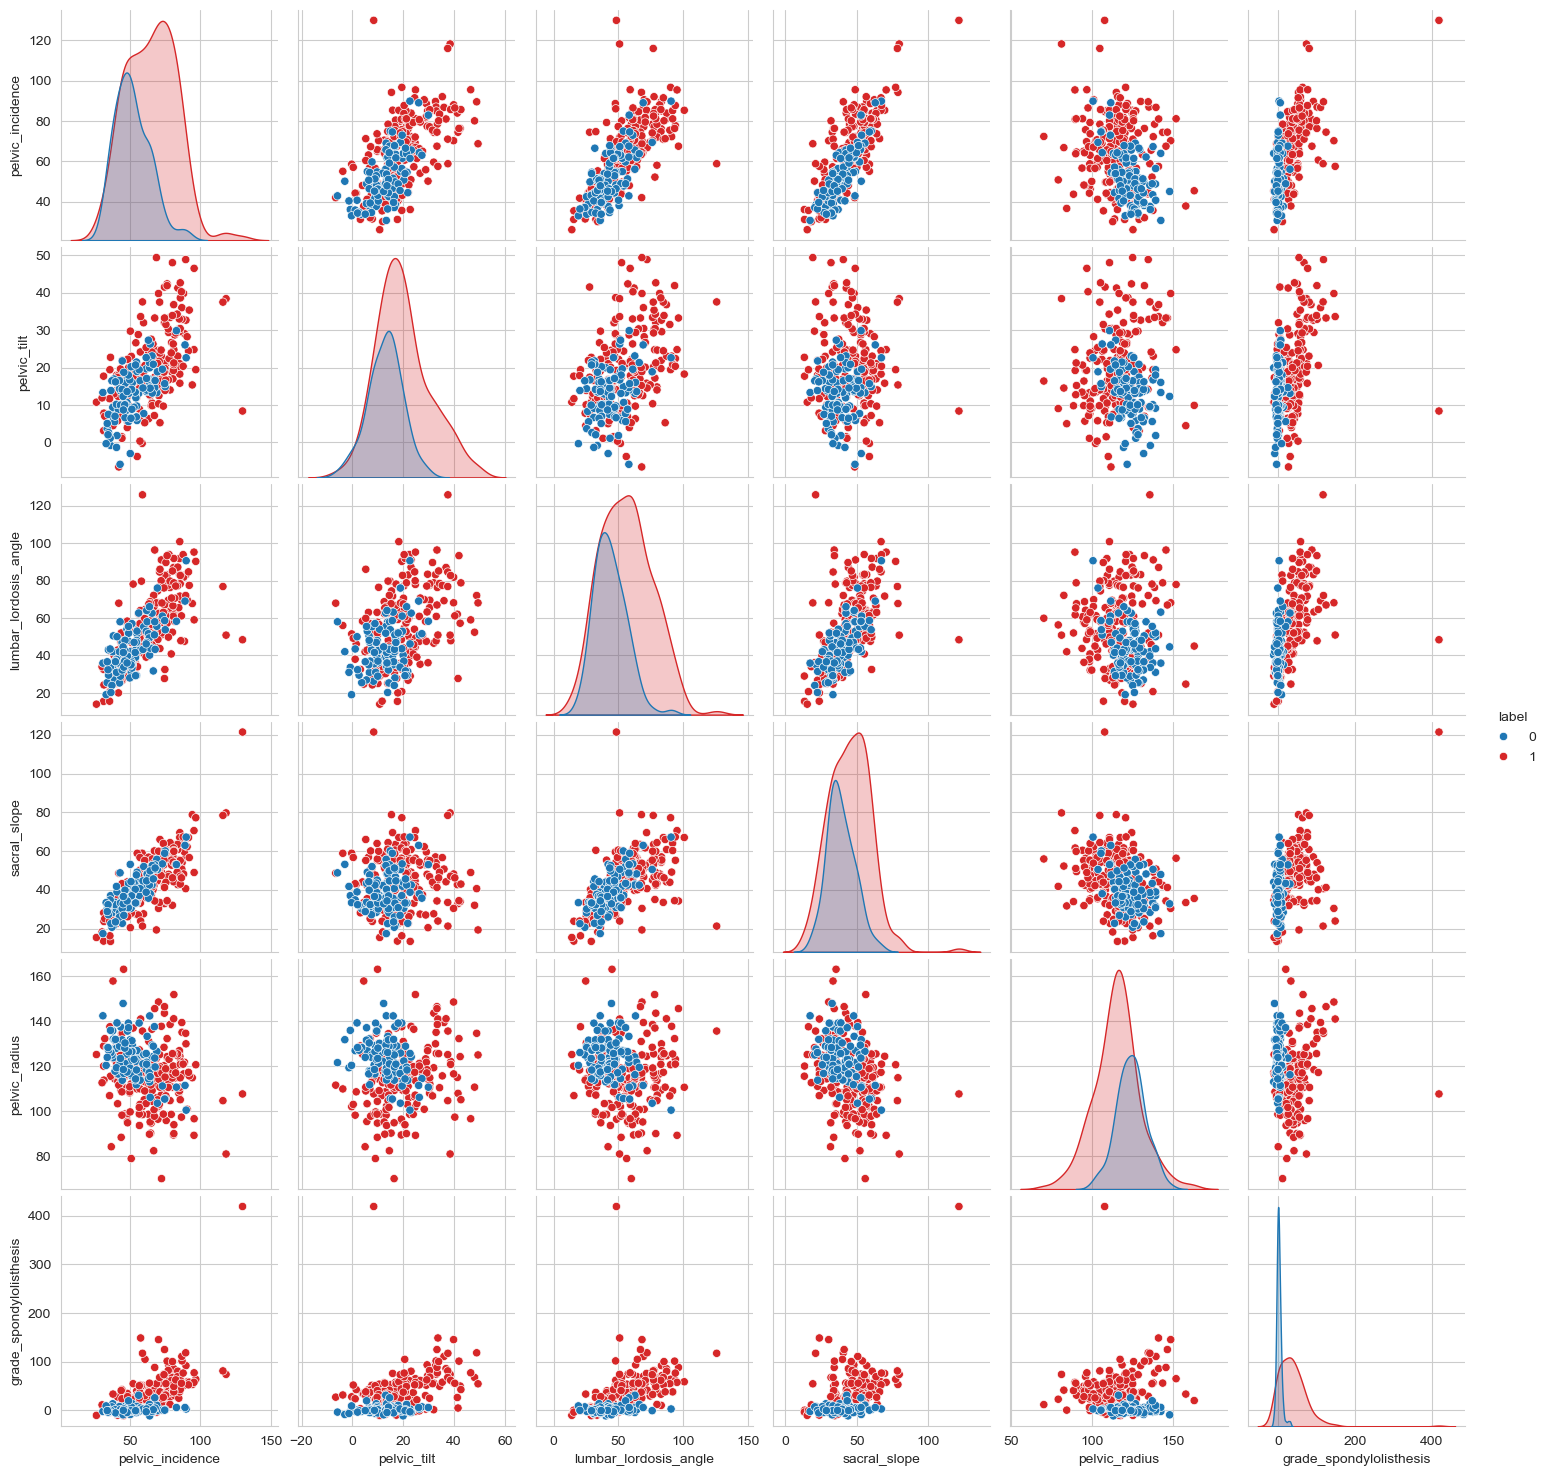

In [1951]:
# creating scatterplots for all independent variables
sns.pairplot(data=df, hue='label', palette={0: 'tab:blue', 1: 'tab:red'})

# ii.

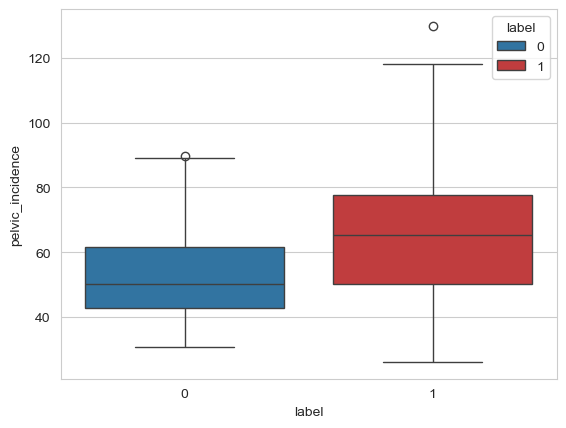

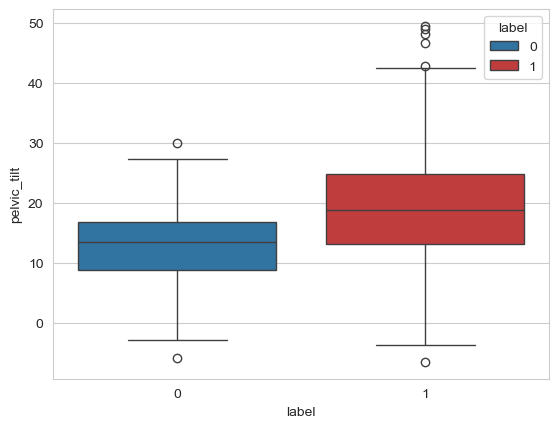

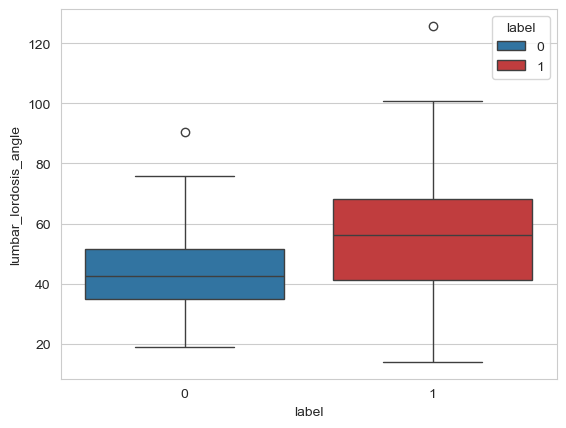

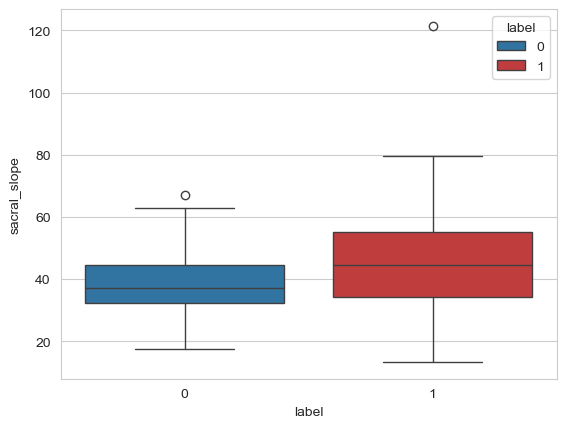

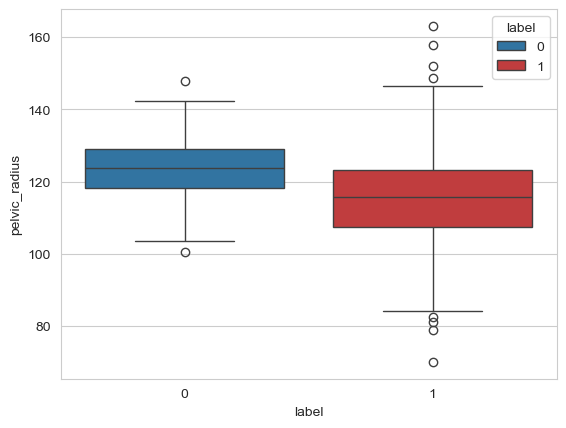

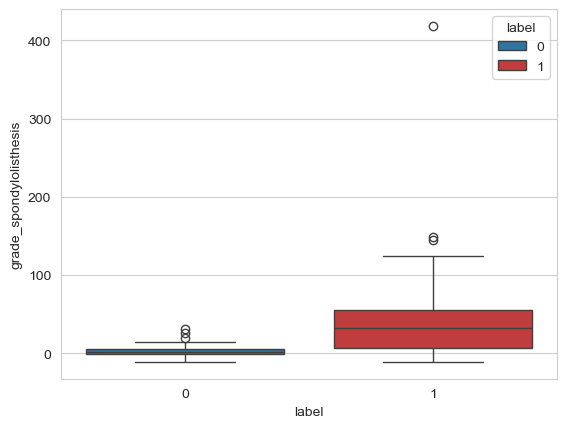

In [1952]:
# plotting boxplots for each of the independent variables
sns.boxplot(data=df, x='label', y='pelvic_incidence', hue='label', palette={0: 'tab:blue', 1: 'tab:red'})
plt.show()
sns.boxplot(data=df, x='label', y='pelvic_tilt', hue='label', palette={0: 'tab:blue', 1: 'tab:red'})
plt.show()
sns.boxplot(data=df, x='label', y='lumbar_lordosis_angle', hue='label', palette={0: 'tab:blue', 1: 'tab:red'})
plt.show()
sns.boxplot(data=df, x='label', y='sacral_slope', hue='label', palette={0: 'tab:blue', 1: 'tab:red'})
plt.show()
sns.boxplot(data=df, x='label', y='pelvic_radius', hue='label', palette={0: 'tab:blue', 1: 'tab:red'})
plt.show()
sns.boxplot(data=df, x='label', y='grade_spondylolisthesis', hue='label', palette={0: 'tab:blue', 1: 'tab:red'})
plt.show()

# iii.

In [1953]:
# seperating the data into class 0 (NO) and class 1 (AB)
class_0 = df[df['label'] == 0]
class_1 = df[df['label'] == 1]

# selecting the train set
class_0_train = class_0[0:70]
class_1_train = class_1[0:140]

#selecting the test set
class_0_test = class_0[70:]
class_1_test = class_1[140:]

In [1954]:
# concatenating the train and test dfs together
df_train = pd.concat([class_0_train, class_1_train], ignore_index=True)
df_test = pd.concat([class_0_test, class_1_test], ignore_index=True)

In [1955]:
# getting X and y train
X_train = df_train.drop(columns=['label'])
y_train = df_train['label']

# getting X and y test
X_test = df_test.drop(columns=['label'])
y_test = df_test['label']

# Question 1, part c


# i.

In [1956]:
# code for k-nearest neighbors with euclidean metic
knn_euclidean = KNeighborsClassifier(metric='euclidean')

# ii.

In [1957]:
# making a list of k values
k_values = []
for i in range(208, 0, -3):
    k_values.append(i)

print(k_values)

[208, 205, 202, 199, 196, 193, 190, 187, 184, 181, 178, 175, 172, 169, 166, 163, 160, 157, 154, 151, 148, 145, 142, 139, 136, 133, 130, 127, 124, 121, 118, 115, 112, 109, 106, 103, 100, 97, 94, 91, 88, 85, 82, 79, 76, 73, 70, 67, 64, 61, 58, 55, 52, 49, 46, 43, 40, 37, 34, 31, 28, 25, 22, 19, 16, 13, 10, 7, 4, 1]


In [1958]:
# empty list to hold train and test errors for each k
train_errors =[]
test_errors =[]

# iterating through the k values in the list of k values
for k in k_values:
    # training the model to the current k
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)

    # predicting labels for the train and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # calculating the training and testing errors
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

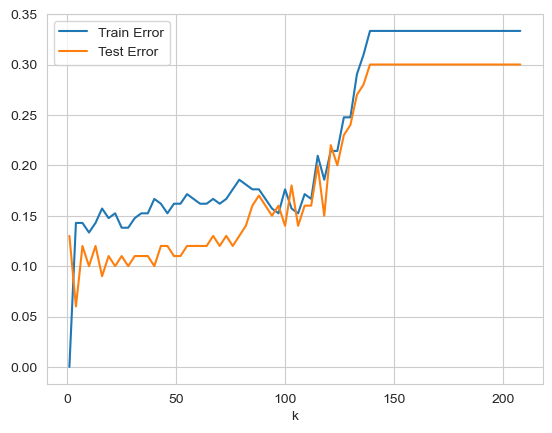

In [1959]:

sns.lineplot(x=k_values, y=train_errors, label="Train Error")
sns.lineplot(x=k_values, y=test_errors, label="Test Error")
plt.xlabel("k")

plt.show()


In [1960]:
# finding the minimum testing error and the best k
min_test_error = min(test_errors)
k_star = k_values[test_errors.index(min_test_error)]

print("Minimum test error:", min_test_error)
print("Best K:", k_star)

Minimum test error: 0.06000000000000005
Best K: 4


In [1961]:
# knn classifier with k star
knn_star = KNeighborsClassifier(metric='euclidean', n_neighbors=k_star)

# fitting the model
knn_star.fit(X_train, y_train)

# predicting labels for the test set 
y_pred = knn_star.predict(X_test)

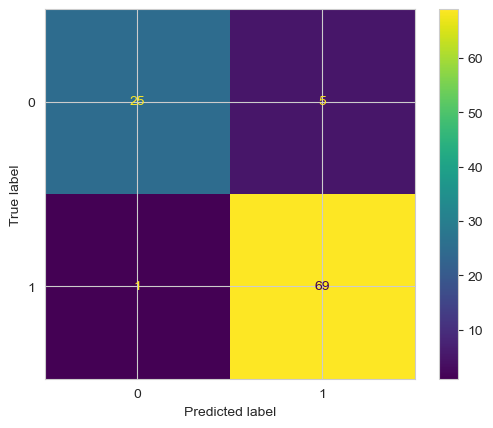

In [1962]:
# generating a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [1963]:
# extracting the true negative rate, true positive rate, precision and f1
cm = confusion_matrix(y_test, y_pred)

true_negative_rate = cm[0][0]
true_positive_rate = cm[1][1]

precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("True Negative Rate:", true_negative_rate)
print("True Positive Rate:",true_positive_rate)
print("Precision:", precision)
print("F1 Score:", f1)

True Negative Rate: 25
True Positive Rate: 69
Precision: 0.9324324324324325
F1 Score: 0.9583333333333334


# iii.

In [1964]:
# making a list of n sizes
n_sizes = []
for i in range(10, 211, 10):
    n_sizes.append(i)

print(n_sizes)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]


In [1965]:
# empty list for best test errors 
best_test_errors = []

for n in n_sizes:
    # getting the sizes of training set
    size_0 = int(n//3)
    size_1 = int(n - (n/3))

    # selecting the train set
    class_0__train_temp = class_0[0:size_0]
    class_1__train_temp = class_1[0:size_1]

    # selecting the test set
    class_0_test_temp = class_0[size_0:]
    class_1_test_temp = class_1[size_1:]

    # concatenating the train and test sets
    df_train_temp = pd.concat([class_0__train_temp, class_1__train_temp], ignore_index=True)
    df_test_temp = pd.concat([class_0_test_temp, class_1_test_temp], ignore_index=True)

    # seperating the features and labels
    X_train_temp = df_train_temp.drop(columns=['label'])
    y_train_temp = df_train_temp['label']

    X_test_temp = df_test_temp.drop(columns=['label'])
    y_test_temp = df_test_temp['label']


    # variables to store the best test error and best k
    best_test_error = float('inf')
    best_k = None
    
    # creating a list of k
    k_values_temp = []
    for i in range(1, n+1, 5):
        k_values_temp.append(i)
    
    # looping through the k values
    for k in k_values_temp:
        
        knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
        knn.fit(X_train_temp, y_train_temp)

        y_test_pred = knn.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        
        if test_error < best_test_error:
            best_test_error = test_error
            best_k = k
    
    best_test_errors.append(best_test_error)

In [1966]:
print(best_test_errors)


[0.24, 0.18999999999999995, 0.21999999999999997, 0.25, 0.30000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.28, 0.21999999999999997, 0.17000000000000004, 0.16000000000000003, 0.15000000000000002, 0.13, 0.13, 0.13, 0.09999999999999998, 0.08999999999999997, 0.08999999999999997, 0.07999999999999996]


Text(0.5, 0, 'N')

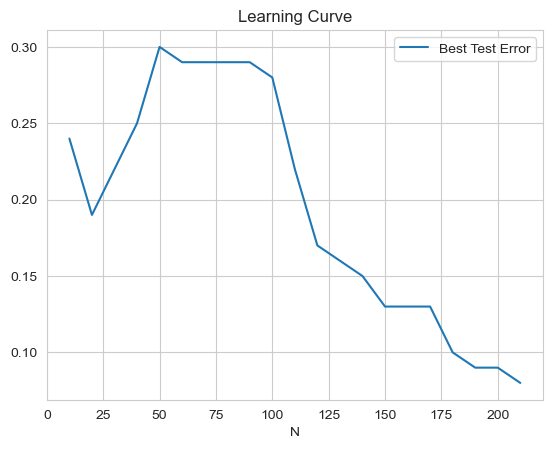

In [1967]:
sns.lineplot(x=n_sizes, y=best_test_errors, label="Best Test Error")
plt.title("Learning Curve")
plt.xlabel("N")



# Question 1, Part d

# i.

In [1968]:
# getting a list of k values
k_values = []
for i in range(1, 200, 5):
    k_values.append(i)
    
print(k_values)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196]


In [1969]:
# MANHATTAN #

# empty list to hold train and test errors for each k
test_errors = []
train_errors = []

# iterating through the k values in the list of k values
for k in k_values:
    # training the model to the current k
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=1)
    knn.fit(X_train, y_train)

    # predicting labels for the train and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # calculating the training and testing errors
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

In [1970]:
# finding the minimum testing error
min_test_error = min(test_errors)
k_star = k_values[test_errors.index(min_test_error)]
# finding the minimum training error
min_train_error = min(train_errors)

print("Minimum test error:", min_test_error)
print("Minimum train error:", min_train_error)
print("Best K:", k_star)

Minimum test error: 0.10999999999999999
Minimum train error: 0.0
Best K: 6


In [1971]:
# creating a table to show
table = pd.DataFrame()
table[''] = ['Min Test Error', 'K*']
table['Manhattan'] = [min_test_error, k_star]
table

,,Manhattan
0,Min Test Error,0.11
1,K*,6.00


In [1972]:
# MINKOWSKI #

# getting p values
p_values = np.arange(0.1, 1.1, 0.1) ** 10

print(p_values)

[1.00000000e-10 1.02400000e-07 5.90490000e-06 1.04857600e-04
 9.76562500e-04 6.04661760e-03 2.82475249e-02 1.07374182e-01
 3.48678440e-01 1.00000000e+00]


In [1973]:
# empty list to hold train and test errors for each k
test_errors =[]
train_errors = []

# iterating through the k values in the list of k values
for current_p in p_values:
    # training the model to the current k
    knn = KNeighborsClassifier(n_neighbors=k_star, metric="minkowski", p=current_p)
    knn.fit(X_train, y_train)

    # predicting labels for the train and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # calculating the training and testing errors
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

/opt/homebrew/Caskroom/miniconda/base/envs/workspace/lib/python3.10/site-packages/sklearn/neighbors/_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/workspace/lib/python3.10/site-packages/sklearn/neighbors/_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/workspace/lib/python3.10/site-packages/sklearn/neighbors/_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/workspace/lib/python3.10/site-packages/sklearn/neighbors/_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing t

In [1974]:
# finding the minimum testing error
min_test_error = min(test_errors)
p_star = p_values[test_errors.index(min_test_error)]

# finding the minimum training error
min_train_error = min(train_errors)

print("Minimum test error:", min_test_error)
print("Minimum train error:", min_train_error)
print("Best Log(10)P:", p_star)

Minimum test error: 0.10999999999999999
Minimum train error: 0.13809523809523805
Best Log(10)P: 1.0


In [1975]:
# creating a table to show
table = pd.DataFrame()
table[''] = ['Min Test Error', 'Log(10)P*']
table['Minkowski'] = [min_test_error, p_star]
table

,,Minkowski
0,Min Test Error,0.11
1,Log(10)P*,1.00


In [1976]:
# CHEBYSHEV #

# empty list to hold train and test errors for each k
test_errors =[]
train_errors = []

# iterating through the k values in the list of k values
for k in k_values:
    # training the model to the current k
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=float('inf'))
    knn.fit(X_train, y_train)

    # predicting labels for the train and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # calculating the training and testing errors
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))

In [1977]:
# finding the minimum testing error
min_test_error = min(test_errors)
k_star = k_values[test_errors.index(min_test_error)]
# finding the minimum training error
min_train_error = min(train_errors)

print("Minimum test error:", min_test_error)
print("Minimum train error:", min_train_error)
print("Best K:", k_star)

Minimum test error: 0.07999999999999996
Minimum train error: 0.0
Best K: 16


In [1978]:
# creating a table to show
table = pd.DataFrame()
table[''] = ['Min Test Error', 'K*']
table['Chebyshev'] = [min_test_error, k_star]
table

,,Chebyshev
0,Min Test Error,0.08
1,K*,16.00


In [1979]:
# MAHALANOBIS #
# empty list to hold train and test errors for each k
test_errors =[]
train_errors = []

# getting the pseudoinverse matrix 
covariance_matrix = np.cov(X_train, rowvar=False)
pseudoinverse_matrix = pinv(covariance_matrix)


# iterating through the k values in the list of k values
for k in k_values:
    # training the model to the current k
    knn = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={'VI': pseudoinverse_matrix})
    knn.fit(X_train, y_train)

    # predicting labels for the train and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # calculating the training and testing errors
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

In [1980]:
# finding the minimum testing error
min_test_error = min(test_errors)
k_star = k_values[test_errors.index(min_test_error)]
# finding the minimum training error
min_train_error = min(train_errors)

print("Minimum test error:", min_test_error)
print("Minimum train error:", min_train_error)
print("Best K:", k_star)

Minimum test error: 0.17000000000000004
Minimum train error: 0.0
Best K: 1


In [1981]:
# creating a table to show
table = pd.DataFrame()
table[''] = ['Min Test Error', 'K*']
table['Mahalanobis'] = [min_test_error, k_star]
table

,,Mahalanobis
0,Min Test Error,0.17
1,K*,1.00


# Question 1, Part e

In [1982]:
# k values list
print(k_values)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196]


In [1983]:
# EUCLIDEAN #

# empty list to hold train and test errors for each k
test_errors =[]
train_errors = []

# iterating through the k values in the list of k values
for k in k_values:
    # training the model to the current k
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean", weights="distance")
    knn.fit(X_train, y_train)

    # predicting labels for the train and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # calculating the training and testing errors
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))

In [1984]:
# finding the minimum testing error
min_test_error = min(test_errors)
k_star = k_values[test_errors.index(min_test_error)]
# finding the minimum training error
min_train_error = min(train_errors)

print("Minimum test error:", min_test_error)
print("Minimum train error:", min_train_error)
print("Best K:", k_star)

Minimum test error: 0.09999999999999998
Best K: 6


In [1985]:
# MANHATTAN #

# empty list to hold train and test errors for each k
test_errors =[]
train_errors = []


# iterating through the k values in the list of k values
for k in k_values:
    # training the model to the current k
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", weights="distance", p=1)
    knn.fit(X_train, y_train)

    # predicting labels for the train and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # calculating the training and testing errors
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))

In [1986]:
# finding the minimum testing error
min_test_error = min(test_errors)
k_star = k_values[test_errors.index(min_test_error)]
# finding the minimum training error
min_train_error = min(train_errors)

print("Minimum test error:", min_test_error)
print("Minimum train error:", min_train_error)
print("Best K:", k_star)

Minimum test error: 0.09999999999999998
Best K: 26


In [1987]:
# CHEBYSHEV #

# empty list to hold train and test errors for each k
test_errors =[]
train_errors = []


# iterating through the k values in the list of k values
for k in k_values:
    # training the model to the current k
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", weights="distance", p=float('inf'))
    knn.fit(X_train, y_train)

    # predicting labels for the train and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # calculating the training and testing errors
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))

In [1988]:
# finding the minimum testing error
min_test_error = min(test_errors)
k_star = k_values[test_errors.index(min_test_error)]
# finding the minimum training error
min_train_error = min(train_errors)

print("Minimum test error:", min_test_error)
print("Minimum train error:", min_train_error)
print("Best K:", k_star)

Minimum test error: 0.10999999999999999
Best K: 16


# Question 1, Part f

The lowest training error rate I achieved was 0.